# Week 4: Making Sense of Data

### Dealing with Missing Values

Ideally, your datasets will have values for all observations and will not contain any invalid records. However, this is not the case in real-life. In this topic, you will explore how to deal with missing values in your dataset. 

### Exploring a dataset

Have a look at the **Pima Indians Diabetes dataset**, which allows the prediction of the onset of diabetes and is a dataset known to have missing values. 

First, load the data and print it. You can see that some columns have the values equal to 0. We can see that some columns have a minimum value of 0, which is not acceptable for columns that contain BMI values, for example. The columns that do have 0 values in them are:
1: Plasma glucose concentration
2: Diastolic blood pressure
3: Triceps skinfold thickness
4: 2-Hour serum insulin
5: Body mass index

For these columns, a value of 0 means an incorrect value. We will replace them with 'NaN'.


In [1]:
import pandas as pd
import numpy as np

#load the dataset    
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
     header=None
    )    


df.describe()



,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
#replacing 0 with NaN
df[[1,2,3,4,5]]=df[[1,2,3,4,5]].replace(0,np.NaN)

df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, the min value changes after the replacement of '0' with 'NaN', as 'NaN' is not considered by most operations.

### Removing rows with missing values

The simplest strategy for handling missing data is to remove records that contain a missing value. You can do this by creating a new Pandas DataFrame with the rows containing missing values removed. This can be done using the **dropna()** function. Initially, the dataframe had 768 rows. After replacement, it has 392 rows.


In [3]:

df.dropna(inplace=True)

df

,0,1,2,3,4,5,6,7,8
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


### Replacing missing values

You can also use a model to replace missing values, by using:
* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

You can do this replacement using the **fillna()** function. In the below, you will be replacing it with the mean.

In [4]:
import pandas as pd
import numpy as np

#load the dataset    
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv',
     header=None
    )    

#replacing 0 with NaN
df[[1,2,3,4,5]]=df[[1,2,3,4,5]].replace(0,np.NaN)

df.fillna(df.mean(), inplace=True)

df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Normalization

Normalization is used in machine learning when the dataset has values that are in different ranges. For example, consider a data set containing two features, alcohol_content(x1), and items_sold(x2). In this dataset, alcohol_content ranges from 0–8, while items_sold ranges from 0–200,000. Items_sold is about 25,000 times larger than the alcohol_content and might intrinsically influence our results due to its higher values, without necessarily being as important as a predictor. To address this disparity, we use **normalisation**.

__Min-Max Scaling__
The most common type of normalization is called min-max scaling. In this approach, the data is fit to a specific range or interval, typically between 0 and 1. 

Min-Max scaling is typically done using the following formula:

$$X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

Where $X$ is the current value of the observation, $X_{min}$ is the minimum value for that feature in the dataset, $X_{max}$ is the maximum value, and $X_{norm}$ is the normalized value.

__Standardization (Z-score normalization)__

Standardization rescales the features so that they  have the properties of a standard normal distribution with $\mu=0$ and $\sigma=1$, where $\mu$ is the  mean (average) and $\sigma$ is the standard deviation from the mean. The standard scores (z-scores) of the samples are calculated as follows: 
$$z=\frac{x-\mu}{\sigma}$$


__Example of Min-max scaling and Standardization__

Consider the **Beijing Air Quality** dataset in the UCI machine learning repository. This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration.  There are many features in this dataset, but we will focus on CO2 and temperature. You will perform min-max scaling  and standardization using scikit-learn.

You can see from the below that the CO2 and temperatures are measured on different scales. 


In [5]:
import pandas as pd
import numpy as np

#load the dataset    
df = pd.io.parsers.read_csv(
    'https://lti-adx.adelaide.edu.au/python/alliance-common/data/beijing.csv',
     header=None,
     usecols=[0,9,11]
    )    

#give names to the columns
df.columns=['Number', 'CO2', 'Temp']



df




,Number,CO2,Temp
0,14865,1500,0.1
1,15008,3200,0.1
2,15129,4700,0.1
3,15196,4200,0.1
4,15223,3200,0.1
...,...,...,...
29527,34088,2900,0.0
29528,34089,2800,0.0
29529,34286,700,0.0
29530,34287,600,0.0


###Min-max scaling

Min-max scaling is done using the **MinMaxScaler()** function from sklearn.

In [6]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(df[['CO2', 'Temp']])
df_minmax = minmax_scale.transform(df[['CO2', 'Temp']])

print('Min-value after min-max scaling:\nCO2={:.2f}, Temp={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nCO2={:.2f}, Temp={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
CO2=0.00, Temp=0.00

Max-value after min-max scaling:
CO2=1.00, Temp=1.00


###Standardization is done using the **StandardScaler()** function from sklearn.

In [7]:

std_scale = preprocessing.StandardScaler().fit(df[['CO2', 'Temp']])
df_std = std_scale.transform(df[['CO2', 'Temp']])


print('Mean after standardization:\nCO2={:.2f}, Temp={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nCO2={:.2f}, Temp={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
CO2=-0.00, Temp=0.00

Standard deviation after standardization:
CO2=1.00, Temp=1.00


To get a better overview of how min-max scaling and standardization affects 

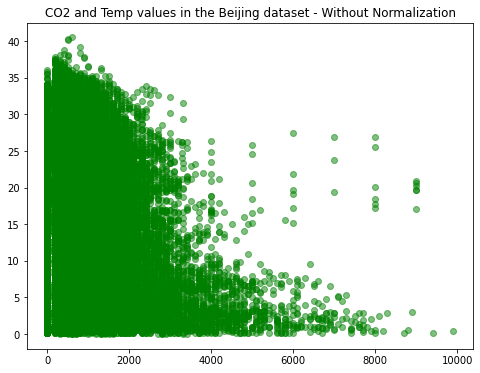

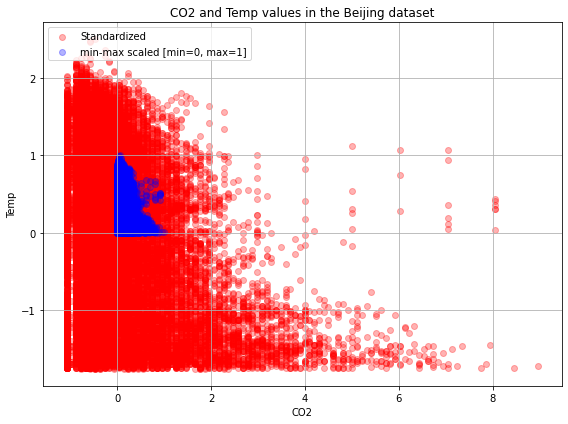

In [8]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('CO2 and Temp values in the Beijing dataset')
    plt.xlabel('CO2')
    plt.ylabel('Temp')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()


plt.figure(figsize=(8,6))    
plt.scatter(df['CO2'], df['Temp'], 
               color='green', label='input scale', alpha=0.5)
plt.title('CO2 and Temp values in the Beijing dataset - Without Normalization')
plt.show()

plot()
plt.show()

### PCA in scikit-learn


In [9]:
#libraries 
import numpy as np 
import matplotlib.pyplot as plt 
#For plotting, Seaborn will be used 
import seaborn as sns 
# set Seaborn up as the default enviroment 
sns.set()

(-3.564082940773619,
 2.5333159810462376,
 -3.2872418013806826,
 2.3823685037453233)

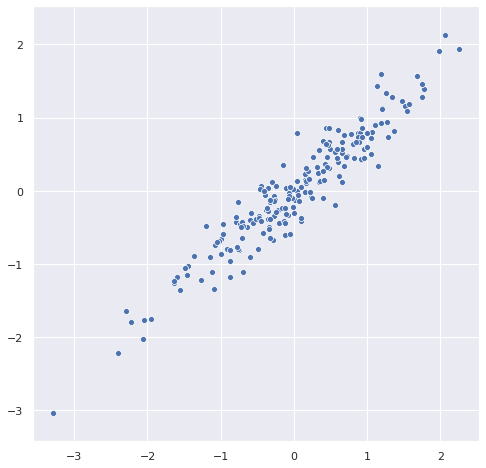

In [10]:
#visualising a two-dimensional dataset
#To create a line of points we use product of two arrays 
random = np.random.RandomState(6)#Seed to get the same random numbers 

#We use the dot (product between two arrays) function to simulate a pattern 
#and avoid the randomness of the points (looks like noise). 
x_points = np.dot(random.rand(2,2),random.randn(2, 200)).T#use to get the product between 

#We use the transpose to get two dimentions.
plt.figure(figsize=(8,8))

#Plotting with Seaborn
sns.scatterplot(x_points[:,0],x_points[:,1])
plt.axis('equal')
#Note: the Array printed as a out is the values of the axis to 
# have the adjust of the axis (previous line code)

You will now apply  PCA the data. PCA will find the relationship between the points ang get a list of the principal points in the data. You perform PCA using Scikit-learn's estimator PCA. 

Code to perform PCA 
 
 PCA(n\_components=$<$int$>$)  
 where n_components is the number of components to keep. 
 
 PCA.fit($<X>$)   
 This method fits your model with $X$ data. 

If you want to know more about the rest of the PCA parameters and methods, visit https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
 

In [11]:
#importing the method 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)# defining the PCA estimator 
pca.fit(x_points) # Fit with our data 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The fit learns some quantities from the set, the most important components and explained variance. 

In [12]:
# Print the components to find out the quantities learned by PCA 
print('Components \n', pca.components_)

# Print the variance
print('Explained variance \n', pca.explained_variance_)

Components 
 [[-0.75933228 -0.65070307]
 [-0.65070307  0.75933228]]
Explained variance 
 [1.45688402 0.03487972]


[(-3.5, 3.0), (-3.5, 3.0)]

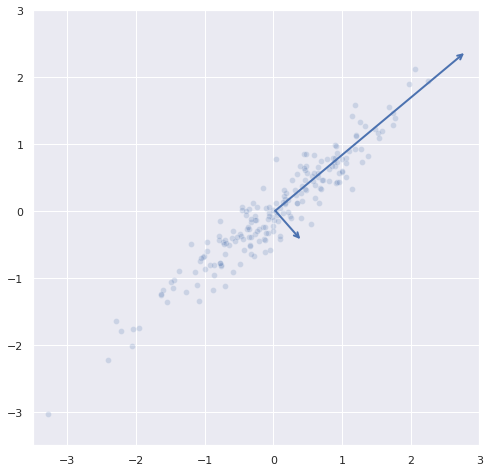

In [13]:
#definig the arrow that will plot  
arrow = dict(arrowstyle='<-', linewidth=2, shrinkA=0, shrinkB=0, color='b')

#Plotting the data 
plt.figure(figsize=(8,8))
#Plotting x_points with seaborns
sns.scatterplot(x_points[:,0],x_points[:,1], alpha=0.2)
#To draw a the components and the variance  
for length, vector in zip(pca.explained_variance_, -pca.components_):
    v = vector * 3 * np.sqrt(length)#getting the vector that will be added to pca_mean
    ax =plt.gca()
    #Per-feature empirical mean, estimated from the training set
    ax.annotate('', pca.mean_, pca.mean_ + v, arrowprops=arrow)

ax.set(xlim=(-3.5, 3), ylim=(-3.5, 3))   
    

These vectors represent the principal axes of the data.  The length is the measure of the variance of the data when is projected onto that axis. The projection of each point onto the principal axes are the principal components of the data.  

#### Reducing the Data to One Dimension

In [14]:
#One component 
pca = PCA(n_components=1)
pca.fit(x_points)
x_pca = pca.transform(x_points) #Fit the model with X and apply the dimensionality reduction on X

# Print the shape of the vectors 
print('Original in x_points.shape', x_points.shape)
print('Transformed in x_pca.shape', x_pca.shape)

Original in x_points.shape (200, 2)
Transformed in x_pca.shape (200, 1)


Now reduce the data in one-dimension. To understand the effect of this reduction, plot the inverse transformation of this data over the original data. 

The **inverse_transform** method transforms  data back to its original space.

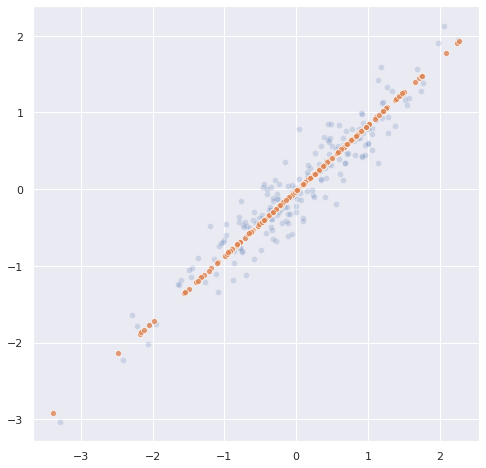

In [15]:
#Transform back x_pca to the original space
x_inverse = pca.inverse_transform(x_pca) 

#Plotting the data 
plt.figure(figsize=(8,8))

#Plotting x_points with seaborns
sns.scatterplot(x_points[:,0],x_points[:,1], alpha=0.2)
sns.scatterplot(x_inverse[:,0],x_inverse[:,1], alpha=0.8)

The blue points represent the original data and the orange points are the projected version. You can see how PCA only keeps the components with the highest variance. Looks like at least the 50% of the points were removed, but the general relationship of the data points is mostly preserved.   

#### Example of the presented metrics 

In the following example, you obtain  the above metrics for three classes, using sklearn.metrics and you will create a confusion matrix in a graph using the Seaborn library. You will create two arrays, to emulate the results of a classification model. The first array will contain the true values and the second will contains the predict values. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
#For plotting, Seaborns will be used 
import seaborn as sns 
# set seaborn up as the default enviroment 
sns.set()

In [17]:
#Creating two arrays
y_true = np.array   ([2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2])
y_predict = np.array([1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 2])
print('y_true    ',y_true)
print('y_predict ',y_predict)

y_true     [2 0 0 1 1 1 2 0 1 0 1 2 1 0 2 1 2 0 0 2]
y_predict  [1 0 0 1 1 2 2 0 1 0 2 2 1 1 2 1 2 0 0 2]


In [18]:
#Calculate accuracy, precision and recall 
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy = ', accuracy_score(y_true, y_predict))
print('Precision= ', precision_score(y_true, y_predict, average='macro'))
print('Recall   = ', recall_score(y_true, y_predict, average='macro'))

Accuracy =  0.8
Precision=  0.8095238095238096
Recall   =  0.8015873015873015


In [19]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predict)


array([[6, 1, 0],
       [0, 5, 2],
       [0, 1, 5]])

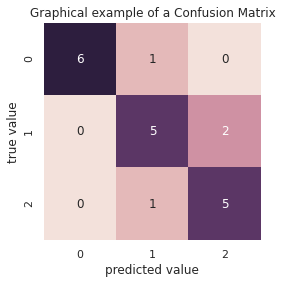

In [20]:
#Plotting the confusion matrix 
#Getting the matrix 
cm = confusion_matrix(y_true, y_predict)
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
sns.heatmap(cm, square=True, annot=True, cbar=False, cmap=cmap)
plt.title('Graphical example of a Confusion Matrix')
plt.xlabel('predicted value')
plt.ylabel('true value');

In the diagonal of the matrix, you can find how many classes were classified correctly. For class '0', six samples of seven was well classified  and one was classified as class '1'. For class '1', the classifier did well in five times but was confused  two times whenn it predicted as a class '2'. For class '2', the classifier was right five times and wrong once, when it predicted as a class '1'.   

#### Example of GridSearchCV
Let’s test the GridSearchCV tool in the well-known Iris dataset.

In [21]:
#loading the dataset 
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [22]:
#SVM model 
from sklearn.svm import SVC 
#Divide the data in training and split 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline # library to make a pipeline
svc = SVC(kernel='rbf', class_weight='balanced')
model= make_pipeline(svc)#We build of model with svc

Getting the best values for the parameters using GridSearchCV

GridSearchCV(model, param_grid, cv=5)

* param_grid can be a dictionary or a list of dictionaries. The dictionary must be included the name of the parameter to calibrate as a key and as a value a list of parameter settings to try.
* cv (cross-validation) is to specify how many folds the data will be split. 

In [23]:
from sklearn.model_selection import GridSearchCV
#Hyperparameters to calibrate 
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#Searching for the optimal from param_grid
grid = GridSearchCV(model, param_grid, cv=5)# cv determines the cross-validation splitting
#Checking how many time takes to find the optimum values 
%time grid.fit(X, y)
print('best parameters',grid.best_params_)

CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 124 ms
best parameters {'svc__C': 50, 'svc__gamma': 0.005}


#### Example of **RandomizedSearchCV**

andomizedSearchCV(model, param_distributions, n_iter, cv)

*  param_distributions is a dictionary with the name of the parameter as a key and distributions to try, you can use scipy.stats.distributions. 

* n_iter is the number of parameter settings that are sampled. By default 10

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
n_iter_search =20
#using stats to give a range of  samples of parameters that will be tested 
param_distributions = {'svc__C': stats.uniform(1,50),
              'svc__gamma': stats.uniform(0.1,1.0)}
random_search = RandomizedSearchCV(model, param_distributions, 
                                   n_iter=n_iter_search, cv=5)
#Checking how many time takes to find the optimum values 
%time random_search.fit(X, y)
print('best parameters',random_search.best_params_)

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 148 ms
best parameters {'svc__C': 11.341084006793949, 'svc__gamma': 0.1470048736723634}


### Correct Model Evaluation

__Loadind the breast_cancer data__

In [25]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target 
print(y.shape)
X.shape

(569,)


(569, 30)

__Selecting the model and its parameters__     
We select K nearest neighbor KNN with n_neighbors=1, which means that the class of an unknown point (instance) is the same as the class of its closet training point. 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

__Fit the model__   
After training the model, we use the model to predict the classes that beforehand the model knows. 

In [27]:
model.fit(X,y)
y_predict=model.predict(X)

__Measure the accuracy of the model__

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

1.0

### Validation using the Holdout Set

In [30]:
#__Loadind the breast_cancer data__

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target 
print(y.shape)
X.shape

__Selecting the model and its parameters__     
We select K nearest neighbor KNN with n_neighbors=1, which means that the class of an unknown point (instance) is the same as the class of its closet training point. 

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

__Fit the model__   
After training the model, we use the model to predict the classes that beforehand the model knows. 

model.fit(X,y)
y_predict=model.predict(X)

__Measure the accuracy of the model__

from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

SyntaxError: invalid syntax (<ipython-input-30-6f8cdb9ec193>, line 10)

### Cross-validation

In [ ]:
#This is one way to perform two folds 
y_predict1 = model.fit(X_train2,y_test2).predict(X_train1)
y_predict2 = model.fit(X_train1,y_test1).predict(X_train2)
accuracy_score(y_test1,y_predict1), accuracy_score(y_test2,y_predict2)

Another simple way is to perform using cross_val_score from model_selection.

cross_val_score(model, $<$features\_array$>$,$<$clases\_array$>$, cv=5)

* model is the model to use to fit your data. 
* cv determines the splitting method if it is a number, so it represents the number of folds by default is 3-fold. 

When the validation is repeated across a different subset of the data, we can have a better idea of the performance of our model.  

In the next section, cross-validation will be explained in detail. 

In [31]:
from sklearn.model_selection import cross_val_score
#model is KNN 
cross_val_score(model,X,y, cv=2)#2-fold 

array([0.90877193, 0.9084507 ])

### Practice -

In your Jupyter notebook or datacamp light widget write code to use cross_val_score with 5-fold in the breast_cancer data and display the 5 scores and the mean and the standar deviation of the scores. 



In [32]:
#solution 
import numpy as np 
score=cross_val_score(model,X,y, cv=5)
print('score \n',score)
print('media score',np.round(score.mean(),3), 'std', np.round(score.std(),3))

score 
 [0.85964912 0.92982456 0.9122807  0.9122807  0.91150442]
media score 0.905 std 0.024


### Support Vector Machines for Classification

In [33]:
#libraries
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
#For plotting, Seaborns will be used 
import seaborn as sns 
# set seaborn up as the default enviroment 
sns.set()


In the following example you can observe how the two classes are well separated.
We use **sklearn.datasets.samples_generator** to create blobs of points with a Gaussian distribution.
To make the sample of data for classification we use the make_blobs function with these parameters. 
* n_sample. The number of samples to generate (default 100).
* n_features. The number of features per each sample (default 2). 
* centers. The number of centers to generate or fixed center location.
* cluster_std. The standar deviation of the clusters. 
* random_state. Determines random number generation for dataset creation. 


The function returns: 
* $X$: array of shape [n_samples, n_features]. The generated samples. 
* $y$: array of shape[n_samples]. The integer labels for a cluster membership of each sample

More details about the make_lobs function can be found at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


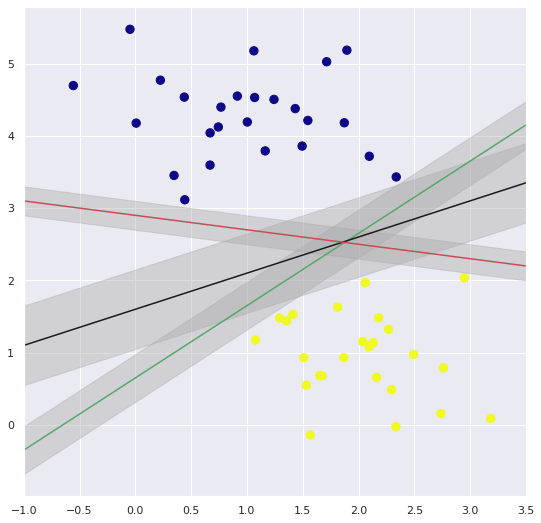

In [34]:
from sklearn.datasets.samples_generator import make_blobs 
#To create a data divide into two clusters 
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.60, random_state=0)
#Plotting a scatter plot
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=y, s =70, cmap='plasma')
#plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

#To set the y-axis and the margin of the linear disciminate per each line
for m, b, d, l in [(1, 0.65, 0.33,'-g'), (0.5, 1.6, 0.55,'-k'), (-0.2, 2.9, 0.2,'-r')]:    
    yfit = m * xfit + b    
    plt.plot(xfit, yfit, l)    
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',alpha=0.4)    
    
plt.xlim(-1, 3.5);

plt.show() 


You can observe that the dataset can be divided by a line, so one of youe best options is a SVM. 

In the plot, you can observe that three linear discriminative classifiers with three possible margins (the red, green and black lines). These linear classifiers would attempt to draw a straight line to separate the two classes or targets. 

The SVMs even can draw around of each line a dark grey margin up to the nearest point. In this case the best is the black line, because it can provide a bigger margin. 


### Example of the face recognition using SVM

You will perform SVM in a face recognition problem. You will use labeled faces from the Wild dataset, which has 1348 collected pictures of famous politicians in the world. You can download the dataset using Scikit-learn library. 

In [35]:
#download the dataset
from sklearn.datasets import fetch_lfw_people
famous_faces = fetch_lfw_people(min_faces_per_person=60)
n_samples, h, w = famous_faces.images.shape
X = famous_faces.data
y = famous_faces.target
n_classes = famous_faces.target_names
n_features = X.shape[1]
print("Total dataset size:")
print("n_samples:",n_samples)
print("n_features:", n_features)
print("n_classes:", n_classes)

Total dataset size:
n_samples: 1348
n_features: 2914
n_classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


The below code is used to plot some faces of the dataset. 

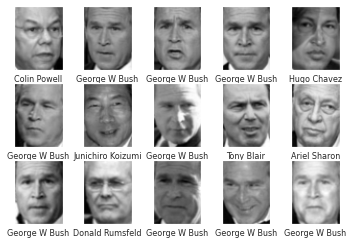

In [36]:
import matplotlib.pyplot as plt 
SMALL_SIZE=8 #define the small size of the letters
plt.rc('axes', labelsize=SMALL_SIZE)          # controls default text sizes
fig, ax = plt.subplots(3,5)
#Code to print 15 faces 
for i, axi in enumerate(ax.flat):
    axi.imshow(famous_faces.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[], 
            xlabel = famous_faces.target_names[famous_faces.target[i]])

The size of each image is [62$\times$ 47] = 2914 pixels. We can use each pixel as a feature, but sometimes it is more effective to use some of the features or extract the more meaningful features. In this example we will use principal components analysis (PCA) to extract the 150 fundamental components to feed as input in our SVM classifier. 

When you are building a model, there exist sequential transformations that will applied to the model in a **pipeline**. 

from sklearn.pipeline import make_pipeline  
make_pipeline(steps)   

where steps is a list of estimators. 
An estimator is an equation for selection of the best or more probably acurrate model.  

In [37]:
# importing SVM 
from sklearn.svm import SVC #Support vector for Calssification
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline # library to make a pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
#parameter whiten used to ensure only uncorrelated outputs 
svc = SVC(kernel='rbf', class_weight='balanced')
model= make_pipeline(pca,svc)#We build of model with pca and svc

To split the data into a training and testing set, we use cross-validation. 

In [38]:
from sklearn.model_selection import train_test_split
#X = famous_faces.data
#y = famous_faces.target
#We got X and y  
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
#We define a seed to get the same split in the data 

Some parameters for SVM need to be tuned to have a better performance, but how do you know what are the best values of the parameters? One solution is to test some combinations  by hand, but this can be tedious and take  a lot of time. Another solution is used **GridSearchCV**, which is an estimator with a grid search preamble to tune hyper-parameters. You establish some possible values to GridSearchCV and it searches using all of them and returns the optimal ones.

In [39]:
from sklearn.model_selection import GridSearchCV
#Parameter to calibrate 
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#Searching for the optimal from param_grid
grid = GridSearchCV(model, param_grid, cv=5)# cv determines the cross-validation splitting
#Checking how many time takes to find the optimum values 
%time grid.fit(X_train, y_train)
print('best parameters',grid.best_params_)

CPU times: user 1min 4s, sys: 623 ms, total: 1min 5s
Wall time: 23.7 s
best parameters {'svc__C': 10, 'svc__gamma': 0.001}


You then assign the values of the parameters and fit the model .

In [40]:
model = grid.best_estimator_
#In y_fit are store the predictions made by the model 
y_fit = model.predict(X_test)

Text(0.5, 0.98, 'Predicted Names, Incorrect predictions in Red')

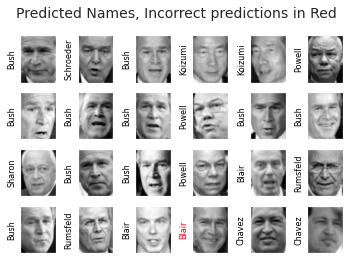

In [41]:
fig, ax = plt.subplots(4,6)
#Code to print 15 faces 
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='gray')
    axi.set(xticks=[], yticks=[]) 
    axi.set_ylabel(famous_faces.target_names[y_fit[i]].split()[-1],
                   color='black'if y_fit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names, Incorrect predictions in Red', size=14)

The optimal estimator mislabelled just one face - that is, Bush's face is mislabeled as Blair. You can review the performance of the estimator using the classification report, which lists the statistics class by class. 

In [42]:
#Print the metrics to measure the performance of the classifier 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_fit, 
                            target_names = famous_faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Let's also show the confusion matrix.

Text(89.18, 0.5, 'predicted label')

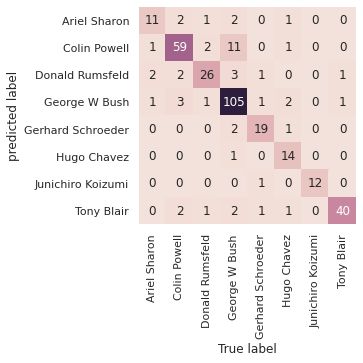

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 


cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_fit)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels=famous_faces.target_names,
           yticklabels=famous_faces.target_names, cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)

### Practice on your own -  SVM classifier in breast cancer wisconsin dataset  
The breast cancer dataset is a classic and very easy binary classification dataset. This dataset has 2 classes ['malignant', 'benign'], 569 samples and 30 features. 

The below code shows you how to get the data and transform it into a DataFrame.


In [44]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10,50,85]]
print(list(data.target_names))

['malignant', 'benign']


Transforming the data in a DataFrame

In [45]:
df_cancer=pd.DataFrame(np.c_[data['data'], data['target']],
           columns= np.append(data['feature_names'], ['target']))
df_cancer['target_names']=pd.Series(data.target)
#Giving a names in the target_names insted of 0 or 1 
df_cancer.replace(to_replace={'target_names': {0: data.target_names[0]}}, inplace=True)
df_cancer.replace(to_replace={'target_names': {1: data.target_names[1]}}, inplace=True)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,malignant


You will need to store the features from the data into the variable $X$ with the exception of the columns' target and target_names. Also, the column target will be stored in $y$. 

Setting in $X$ [n_features, n_samples] and in $y$ the clases[n_samples]

In [46]:
#storing and dropping the columns 
X = df_cancer.drop(['target','target_names'], axis=1)
y = df_cancer['target']
print(X)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Once this process is done, you will need to define the model and set in a pipeline. These are the steps you should take:
1. You will employ PCA on 150 components and then split the dataset into training and testing set using cross-validation. 
2. You should use GridSearchCV to search the best values for the parameters. 
3. You then assign the parameters and fit the model. 
4. Lastly, you will plot the confusion matrix. 

Your code should look like this:

In [47]:
from sklearn.svm import SVC #Support vector for Calssification
from sklearn.pipeline import make_pipeline # library to make a pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
#parameter whiten used to ensure only uncorrelated outputs 
svc = SVC(kernel='rbf', class_weight='balanced')
model= make_pipeline(svc)#We build of model with svc

To split the data into a training and testing set, we use cross-validation. 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
#We define a seed to get the same split in the data 

Getting the best values for the parameters 

In [49]:
from sklearn.model_selection import GridSearchCV
#Parameter to calibrate 
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#Searching for the optimal from param_grid
grid = GridSearchCV(model, param_grid, cv=5)# cv determines the cross-validation splitting
#Checking how many time takes to find the optimum values 
%time grid.fit(X_train, y_train)
print('best parameters',grid.best_params_)

CPU times: user 616 ms, sys: 0 ns, total: 616 ms
Wall time: 615 ms
best parameters {'svc__C': 50, 'svc__gamma': 0.0001}


You assign the values of the parameters and fit the model 

In [50]:
model = grid.best_estimator_
#In y_fit are store the predictions made by the model 
y_predict = model.predict(X_test)

Printing the classification report with some performance measures 

In [51]:
#Print the metrics to measure the performance of the classifier 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict, 
                            target_names = ['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



Plotting the confusion matrix 

Text(89.18, 0.5, 'predicted label')

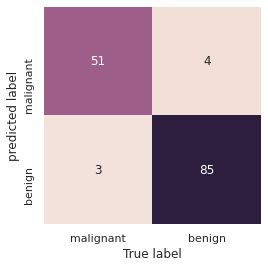

In [52]:
from sklearn.metrics import confusion_matrix

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['malignant', 'benign'],
           yticklabels= ['malignant', 'benign'], cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)

## Random forest Classifier
One of the most popular existing classifiers is the random forest classifier. 
### Example of a random forest classifier using scikit-learn
The code to use when using a random forest classifier in scikit-learn is the below:

from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=100)
 
There are four main hyperparameters to consider when using a random forest classifier, namely:

* n_estimators. The number of trees in the forest. By default 100 trees. 
* max_depth is the maximum number of levels in each decision tree. By default is None, which means that each tree will expend until each leaf is pure, which means the 
* min_samples_split is the minimum number of instances to split an internal leaf node. By default 2.
* min_samples_leaf is the minimum number of samples required to be at a leaf node. By default 1.

More details about the parameters of the random forest classifier can be found at 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

You'll explore in the below how to use a random forest classifier on the breast cancer dataset you've used before. As before, you'll go through the steps in the machine learning pipeline.

#### 1. Loading the dataset breast_cancer

First, as before, you'll need to load the dataset

In [53]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10,50,85]]
print(list(data.target_names))

['malignant', 'benign']


#### 2. Preparing the data

You'll then need to prepare the dataset by setting in $X$ [n_features, n_samples] and in $y$ the clases[n_samples]

In [54]:
X = data.data
y = data.target 
X.shape, y.shape 

((569, 30), (569,))

#### 3. Splitting the dataset into training and validation

To split the data into a training and testing set, you will use train_test_split as before.

In [55]:
adiditionfrom sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
#We define a seed to get the same split in the data 

#### 4. Defining the model and running the machine learning pipeline 

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline # library to make a pipeline
from sklearn.metrics import accuracy_score
#parameter whiten used to ensure only uncorrelated outputs 
rf = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  
                            min_samples_leaf = 1)
model= make_pipeline(rf)#We build of model with rf
modelVC = rf.fit(X_train, y_train) 
y_prediction = modelVC.predict(X_test)
accuracy_score(y_test, y_prediction)

0.965034965034965

As you can see, the current accuracy of the model is 0.96. This is a very good accuracy, however in some cases you might want to improve on this result. To achieve that, you would have to use GridSearchCV to tune the hyperparameters of the model. In some cases, hyperparameter tuning will take **a very long time** and thus the improvement in accuracy and other metrics that you would get has to be justified.

#### 5. Hyperparameter tuning

For this example, the calibration of the hyperparameters takes a long time, depending on your computer. If the improvement is large, then this  time can be justified. 

In [57]:
#To Calibrate GridSearchCV
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
gridF.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.7min finished


{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

__6. Model Evaluation__

Once the best values for the hyperparameters have been found, you will assign the values and fit the model using the **fit** function. You will then **predict** the outcome and test the performance of the model using the **accuracy_score** function. 

In [58]:
forestOpt = RandomForestClassifier(random_state = 1, 
                                   max_depth = 8,     
                                   n_estimators = 300, 
                                   min_samples_split = 2, 
                                   min_samples_leaf = 1)
modelOpt = forestOpt.fit(X_train, y_train)
y_predict = modelOpt.predict(X_test)
accuracy_score(y_test, y_predict)

0.972027972027972

As you can see, the acurracy improved from 0.965034965034965 to 0.972027972027972, which is less than 0.01, so perhaps in this case the time spent on improvements is not warranted.

You can also use the **classification_report** function to get an overview of the performance of the classifier on other metrics such as precision and recall. 

In [59]:
#Print the metrics to measure the performance of the classifier 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_predict, 
                            target_names = ['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        54
      benign       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Lastly, you will print out the confusion matrix for this classifier.

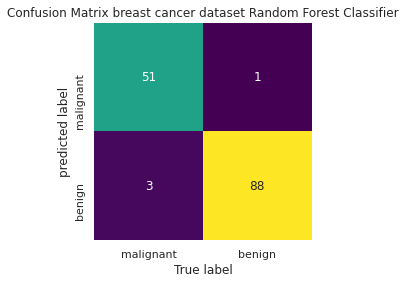

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['malignant', 'benign'],
           yticklabels= ['malignant', 'benign'], cmap='viridis')
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)
plt.title('Confusion Matrix breast cancer dataset Random Forest Classifier')
plt.show()

### Practice on your own 

One of the frequent uses of classifiers is in image classification, and  in optical character recognition among others. In this practice session, you will attempt to automatically classify handwriting. Consider the dataset called **load_digits** from the sklearn.datasets. This dataset has example handwritten digits in the range of [0-9] in the form of images that are 8x8 pixels. 

In your code, you will follow the machine learning pipeline of splitting the data into test and training data, fitting the model, predicting its outcome, printing the classification report and the confusion matrix.

In the below, the data is already loaded and visualised, to give you a head start.




#### Loading the data 

In [61]:
from sklearn.datasets import load_digits
hand_digits = load_digits()
X = hand_digits.data
y = hand_digits.target
hand_digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Visualizing the digits

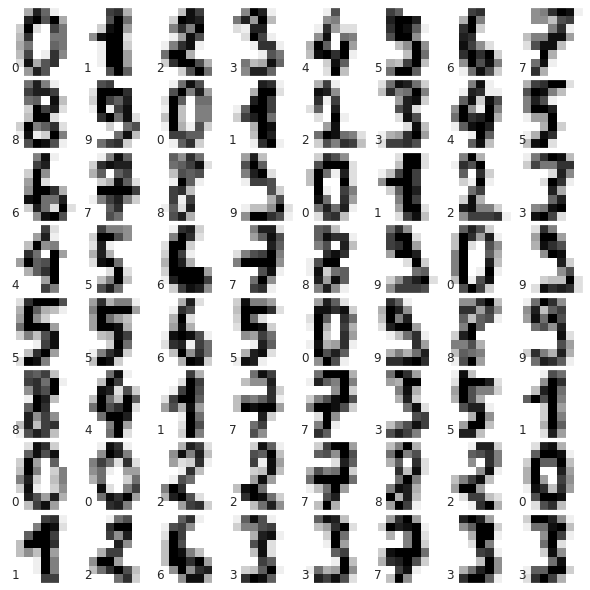

In [62]:
#Set the size of the figure in inches 
fig = plt.figure(figsize=(8,8))
#Set the subplots up
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
#plot the digits image 
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(hand_digits.images[i], 
              cmap=plt.cm.binary, 
              interpolation='nearest')
    ax.set(xticks=[], yticks=[])
    #Set the labels 
    ax.text(0,7,str(hand_digits.target[i]))


#### Your code should look like this:


In [63]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=1200)

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

#Fit the model
model.fit(X_train, y_train)

#Predict the data 
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.9755555555555555

Printing the report of the Random Forest performance classifier 

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.93      0.97        46
           4       0.98      1.00      0.99        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Plotting the Confusion Matrix 

Text(0.5, 1.0, 'Confusion Matrix handwritten digits dataset Random Forest Classifier')

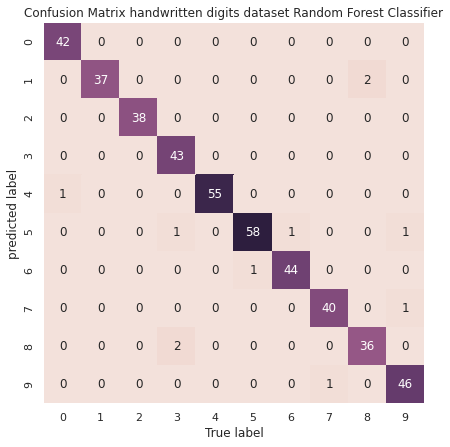

In [68]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels=hand_digits.target_names,
           yticklabels=hand_digits.target_names, cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)
plt.title('Confusion Matrix handwritten digits dataset Random Forest Classifier')

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df_diabetes= pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Artificial Neural Network 

The classifiers that you've learned about are effective for specific prolems but sometimes fail to learn and model non-linear and complex relationships. Having this capability is important because in real-life, a lot of the relationships between input and output are non-linear. In this topic, you will learn about artificial neural networks (ANN), which are algorithms that handle non-linear relationships very well. ANNs are can also generalize, meaning that after they have learned from the inputs, they can infer unseen relationships on unseen data. In addition ANNs do not require specific distributions of input data.


## Example of an ANN using scikit learn

The following code allows for the use of an ANN in scikit learn:

sklearn.neural_network.MLPClassifier

MLPClassifier( activation, hidden_layer_sizes, solver, alpha, max_iter, learning_rate)
Where: 
* __activation__ is the activation function in the hidden layers. You can choose between identity, logistic (sigmoid), tanh and relu. By default relu. 
* __hidden_layer_sizes__ represents the number of neurons in the hidden layer. By default 100. 
* __solver__ is the solver to optimise the weights. By default adam and you can select between 
    * lbfgs is an optimiser in the family of quasi-Newton methods. 
    * sgd is the stochastic gradient descent optimiser.
    * adam is the stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba.

NOTE: adam is recommended for a large dataset. lbfgs is recommended for a  small dataset.
* __alpha__ is a penalty parameter using in the regularization. By default 0.0001 

* max_iter is the maximun number of iterations. However, the solver iterates ul=ntil converge or rich the maximun number of iterations. By default 200. 

* **learning_rate** is the initial rate used. this parameter control the step-size to adjust the weights. Only use in  adamsolver and sgd solver. By default 0.001



### Viewing the Dataset
In this example, the diabetes dataset will be used. 

NOTE: To load the diabetes dataset, the file 'diabetes.csv'  must be in the same directory as your Jupyter Notebook.

In [70]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df_diabetes= pd.read_csv('diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df_diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Missing Values

You've had a look at this dataset before, when looking at missing values. You can see in the summary that for BMI, Insulin, SkinThickness, BloodPressure and Glucose, the minimum value is 0. This value is incorrect, as only a dead person can have a blood pressure of 0.  Let's get a quick look using histogram plots. 

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

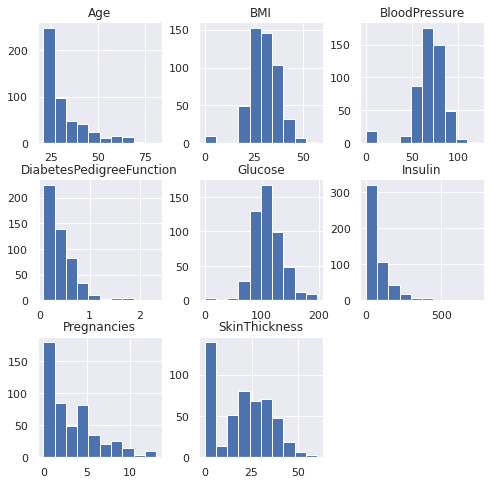

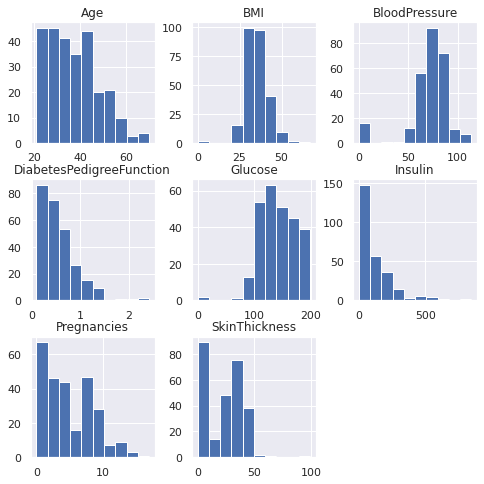

In [72]:
df_diabetes.groupby('Outcome').hist(figsize=(8,8))

Note that there seems to be two sets of plots: this is because we are grouping them by 'Outcome', so effectively plotting two classes.

Remember that we discussed several techniques when dealing with missing values. You could handle the features with an incorrect value of 0 in many ways:
* Drop the samples with value 0. This is nor possible for all of the features because SkinThickness and insulin have a lot of samples. However, is possible for the rest of the features with value 0.
* Set the mean of the feature instead of the value 0. The main inconvenient with this procedure is that by using a mean value, you are distorting the model.
* Don't use the feature. If the feature contains mostly invalid data,  it is possible to omit the feature from the model.



In [73]:
#Removing the data with value 0 for BloodPressure, BMI and Glucose
df_diabetes_clean = df_diabetes[(df_diabetes.BloodPressure != 0) & 
                                (df_diabetes.BMI != 0) & (df_diabetes.Glucose != 0)]
print(' We removed', df_diabetes.shape[0]-df_diabetes_clean.shape[0], 'samples(rows)')

 We removed 44 samples(rows)


In [74]:
df_diabetes_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,724.0,3.866022,3.362803,0.000,1.000,3.000,6.0000,17.00
Glucose,724.0,121.882597,30.750030,44.000,99.750,117.000,142.0000,199.00
BloodPressure,724.0,72.400552,12.379870,24.000,64.000,72.000,80.0000,122.00
SkinThickness,724.0,21.443370,15.732756,0.000,0.000,24.000,33.0000,99.00
Insulin,724.0,84.494475,117.016513,0.000,0.000,48.000,130.5000,846.00
BMI,724.0,32.467127,6.888941,18.200,27.500,32.400,36.6000,67.10
DiabetesPedigreeFunction,724.0,0.474765,0.332315,0.078,0.245,0.379,0.6275,2.42
Age,724.0,33.350829,11.765393,21.000,24.000,29.000,41.0000,81.00
Outcome,724.0,0.343923,0.475344,0.000,0.000,0.000,1.0000,1.00


###  Normalizing the data
 
ANNs are sensitive to the data being in different ranges, and as such the input data for ANN needs to be normalized. In this case, you will normalize the data between 0 and 1 using the techniques you learned in a previous topic.

In [75]:
#Get a list of all the features excluding the outcome 
features = list(set(list(df_diabetes_clean.columns))-set(['Outcome']))
#Performing the normalisation we divide the feature value by its maximum value  
df_diabetes_clean[features]=df_diabetes_clean[features]/df_diabetes_clean[features].max()
print('Describe function')
print(df_diabetes_clean.describe().transpose())
df_diabetes_clean.head(3)

Describe function
                          count      mean       std       min       25%  \
Pregnancies               724.0  0.227413  0.197812  0.000000  0.058824   
Glucose                   724.0  0.612475  0.154523  0.221106  0.501256   
BloodPressure             724.0  0.593447  0.101474  0.196721  0.524590   
SkinThickness             724.0  0.216600  0.158917  0.000000  0.000000   
Insulin                   724.0  0.099875  0.138317  0.000000  0.000000   
BMI                       724.0  0.483862  0.102667  0.271237  0.409836   
DiabetesPedigreeFunction  724.0  0.196184  0.137320  0.032231  0.101240   
Age                       724.0  0.411739  0.145252  0.259259  0.296296   
Outcome                   724.0  0.343923  0.475344  0.000000  0.000000   

                               50%       75%  max  
Pregnancies               0.176471  0.352941  1.0  
Glucose                   0.587940  0.713568  1.0  
BloodPressure             0.590164  0.655738  1.0  
SkinThickness          

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.277686,0.395062,1


As you can see now all the values are between 0 and 1.

### Splitting the data in training and  testing

In [76]:
from sklearn.model_selection import train_test_split
X = df_diabetes_clean[features].values
y = df_diabetes_clean['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print('X_train', X_train.shape, 'X_test', X_test.shape)

X_train (543, 8) X_test (181, 8)


In [77]:
### Running the model

In [78]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(8,8,8), solver='lbfgs', 
                    max_iter=500)
mlp.fit(X_train,y_train)
y_predict_train = mlp.predict(X_train)
y_predict_test = mlp.predict(X_test)

The performance measure for the predicted values in the training data and the testing data is given by a confusion matrix.

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       349
           1       0.75      0.66      0.71       194

    accuracy                           0.80       543
   macro avg       0.79      0.77      0.78       543
weighted avg       0.80      0.80      0.80       543



Text(89.18, 0.5, 'predicted label')

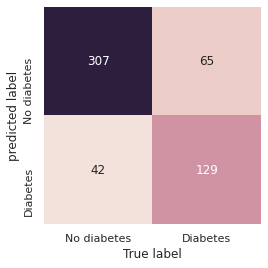

In [79]:
#Training data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train,y_predict_train))

sns.set()

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['No diabetes', 'Diabetes'],
           yticklabels= ['No diabetes', 'Diabetes'], cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       126
           1       0.62      0.60      0.61        55

    accuracy                           0.77       181
   macro avg       0.73      0.72      0.72       181
weighted avg       0.77      0.77      0.77       181



Text(34.82000000000001, 0.5, 'predicted label')

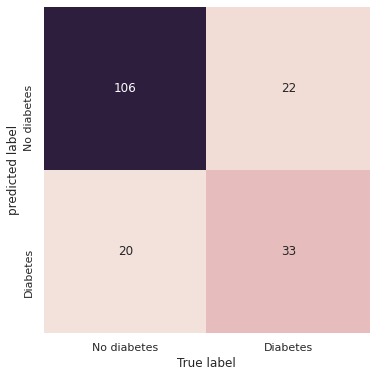

In [80]:
#Testing data
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict_test))

plt.figure(figsize=(6,6))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['No diabetes', 'Diabetes'],
           yticklabels= ['No diabetes', 'Diabetes'], cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)

##### Hyperparameters tuning 
NOTE: Remember that the GridSearchCV() method can take a long time to execute. To make sure that it is running and to get an idea of how the process is progressing, you can use verbose=10 or higher. 

In [81]:
from sklearn.model_selection import GridSearchCV
#Parameter to calibrate 
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(8,8,8), solver='lbfgs', 
                    max_iter=500)
param_grid = {
    'hidden_layer_sizes': [(10,10,10), (20,20,20), (50,50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#Searching for the optimal from param_grid
grid = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=10)# cv determines the cross-validation splitting
#n_jobs=-1 is to uses all the availables cores
#Checking how many time takes to find the optimum values 
grid.fit(X_train, y_train)
print('best parameters',grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1305s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0544s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   20.5s
[Parallel(n_j

best parameters {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Testing with the best Hyperparameters found

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       126
           1       0.65      0.60      0.62        55

    accuracy                           0.78       181
   macro avg       0.74      0.73      0.73       181
weighted avg       0.77      0.78      0.78       181



Text(34.82000000000001, 0.5, 'predicted label')

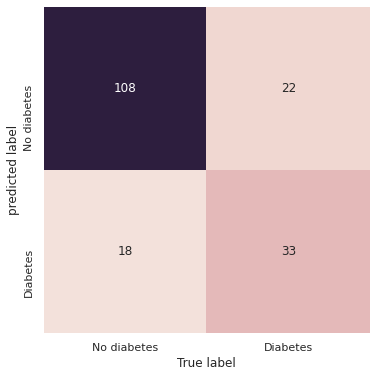

In [82]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10, 10), solver='adam', alpha=  0.0001,
                    learning_rate='adaptive', max_iter=1000)


mlp.fit(X_train,y_train)
y_predict_test = mlp.predict(X_test)
#Using testing data 
print(classification_report(y_test,y_predict_test))


plt.figure(figsize=(6,6))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['No diabetes', 'Diabetes'],
           yticklabels= ['No diabetes', 'Diabetes'], cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)

In this case, the performance of the ANN improves slightly with the new hyperparameters. 

### Example of an ANN on the handwritten digits dataset

In this example, the handwritten digits [0-9] from the sklearn.datasets will be classified. Each image is 8X8 pixels. The data will be loaded and visualised using the code below.

Loading the data: 

In [83]:
from sklearn.datasets import load_digits
hand_digits = load_digits()
X = hand_digits.data
y = hand_digits.target
print('Target or Outcome names')
hand_digits.target_names

Target or Outcome names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Visualizing the images of the digits:

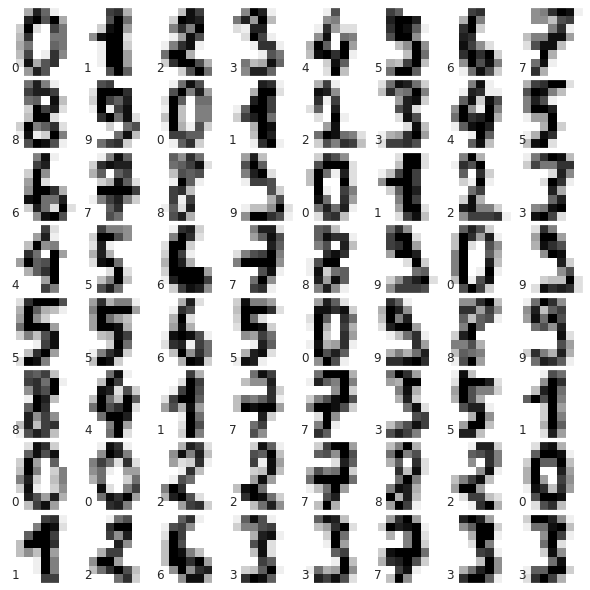

In [84]:
#Set the size of the figure in inches 
fig = plt.figure(figsize=(8,8))
#Set the subplots up
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
#plot the digits image 
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(hand_digits.images[i], 
              cmap=plt.cm.binary, 
              interpolation='nearest')
    ax.set(xticks=[], yticks=[])
    #Set the labels 
    ax.text(0,7,str(hand_digits.target[i]))



To write the machine learning pipeline, you will split the data into a training and testing dataset, then create the Multilayer perceptron model. You will then fit the model and predict.  You will use StandardScaler method, which standardizes features by removing the mean and scaling to unit variance.


In [85]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('ss', StandardScaler()),
                     ('mlp', MLPClassifier(alpha = 0.01, 
                                           hidden_layer_sizes=[150,100]))])
score = cross_val_score(pipeline,X, y, n_jobs=-1, cv=5)               
print(score,'\n', score.mean())

[0.93333333 0.91666667 0.94707521 0.95821727 0.91922006] 
 0.9349025069637884


The accuracy (0.936) obtained for the ANN  is below that the accuracy that you got with the Random Forest Classifier (0.975) in the previous section. The performance of the ANN can potentially be improved by adding more hidden layers and tuning the parameters using GridSearchCV.

### Practice -

In your Jupyter notebook or datacamp light widget write code to use GridSearchCV to find the best parameters for the ANN. Once done, plot the confusion matrix. Instead of using cross_val_score, you should use cross_val_predict.


Your code should look like this:

In [86]:
#Solution 

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
#Calibration of the parameters
pipeline = Pipeline([('ss', StandardScaler()),
                     ('mlp', MLPClassifier(activation='relu', alpha = 0.01, 
                                           hidden_layer_sizes=(100,100,100), solver='adam', 
                    max_iter=200))])



param_grid = {
    'mlp__hidden_layer_sizes': [[150,200], [250,300], [500,300]],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam','lbfgs'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive']
}
#Searching for the optimal from param_grid
grid = GridSearchCV(pipeline,param_grid, cv=5, n_jobs= -1, verbose=10)
# cv determines the cross-validation splitting


In [87]:
#Checking how many time takes to find the optimum values 
grid.fit(X, y)
print('best parameters',grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed: 1

best parameters {'mlp__activation': 'relu', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': [250, 300], 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'adam'}


In [88]:
#We the new parameters we will create a pipeline 
pipeline = Pipeline([('ss', StandardScaler()),
                     ('mlp', MLPClassifier(activation='relu',
                                           alpha = 0.05, 
                                           solver = 'adam',
                                           learning_rate = 'constant',
                                           hidden_layer_sizes=[250,300]))])
score = cross_val_score(pipeline,X, y, n_jobs=-1, cv=5)               
print(score,'\n', score.mean())

[0.93611111 0.91944444 0.95264624 0.97493036 0.93036212] 
 0.9426988548437016


You can see that we have an __improvement__ in the accuracy from 0.936 to 0.944.

In the below, you will plot the confusion matrix.

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Confusion Matrix of Artificial Neural Network classifier to handwritten digits dataset')

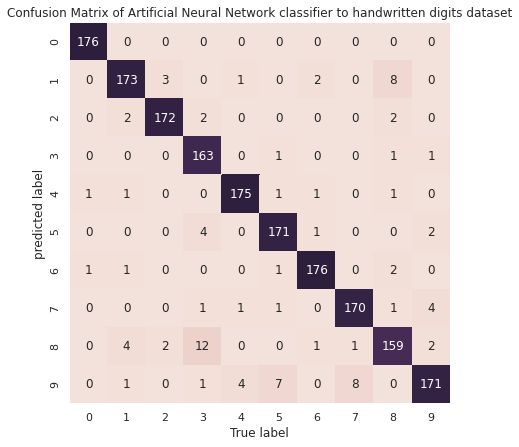

In [89]:
#Creating the convergence matrix 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_predict = cross_val_predict(pipeline,X, y, cv = 5)


plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels=hand_digits.target_names,
           yticklabels=hand_digits.target_names, cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)
plt.title('Confusion Matrix of Artificial Neural Network classifier to handwritten digits dataset')